# Speech Emotion recognition. A group project
Using CNN1D to classify emotion in speech
Using RAVDESS sudio only and SAVEE
Size of Dataset is more than 100 MB - Git hub link - https://github.com/jagjeet12301019/SER_CNN1D
Other links to download the dataset we have used - 

We are using two datasets - 
1.) RAVDESS - 
	a.)This can be downloaded directly from Zenodo
	b.)We require to donload only audio part
		- 1st audio file - https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1
		- 2nd audio file - https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1

2.) SAVEE - This can be downloaded directly from Kahlan website after making an acoount-
Further all the data from 4 folders should be combined into one as we did in this project-
Link to download SAVEE - http://kahlan.eps.surrey.ac.uk/savee/Data/AudioData/


In [1]:
import os
import sys

#Main python library to work with audio files
import librosa
import librosa.display

import pandas as pd
import numpy as np
#Some important keras functionalities to be used in the code to create the model
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#Seaborn to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
# Ipython we will be using to play with the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

print ("executed successfully")

executed successfully


In [2]:

#save dataset file name as below 
file_name = "Audio_Speech_Actors_01-24"
file_nameS = "ALL"
file_nameT = "TESS2"
#save path of dataset in to a variable
Ravdess = os.path.join(os.getcwd(),file_name)
Savee = os.path.join(os.getcwd(),file_nameS)
Tess = os.path.join(os.getcwd(),file_nameT)

print(Ravdess)
print("Executed Successfully")

C:\Users\Jagjeet\AppML\Major Project Final\Pro_1.6_All_Datasets_Spectral_with_MelSpectro_Only\Audio_Speech_Actors_01-24
Executed Successfully


In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + '/'+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)
        
# Data frame created for emotion files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Path files data frame
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [4]:
# Work with our second dataset
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + '/' + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# Emotions files SAVEE data frame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Path files SAVEE data frame
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print("Executed Successsfully")

Executed Successsfully


In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '/' + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
1,angry,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
2,angry,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
3,angry,C:\Users\Jagjeet\AppML\Major Project Final\Pro...
4,angry,C:\Users\Jagjeet\AppML\Major Project Final\Pro...


In [6]:
# Combine both datasets in to one
data_path = pd.concat([Ravdess_df, Savee_df,Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
print("Executed Succssfully")

Executed Succssfully


In [7]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

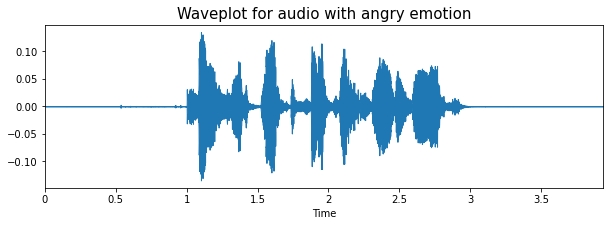

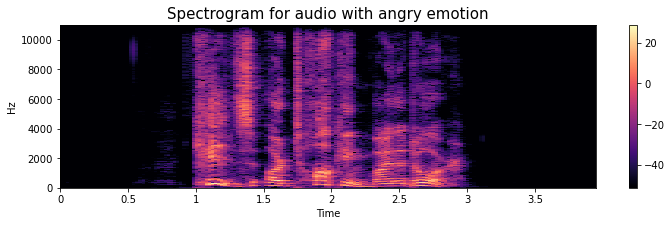

In [8]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

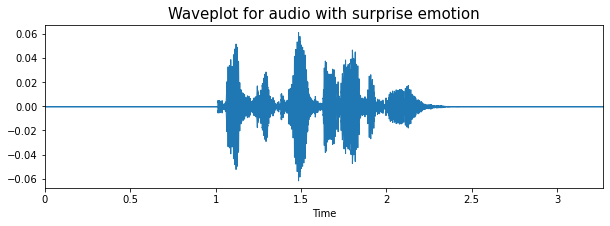

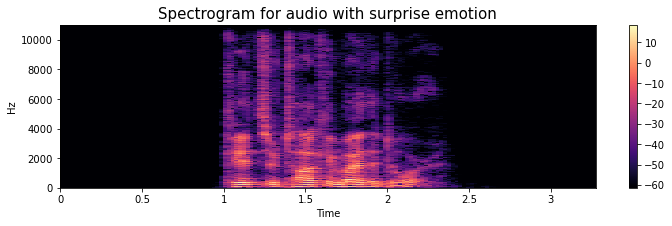

In [9]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

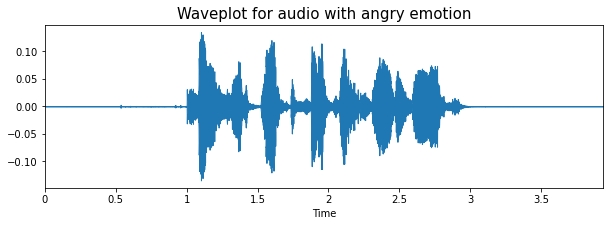

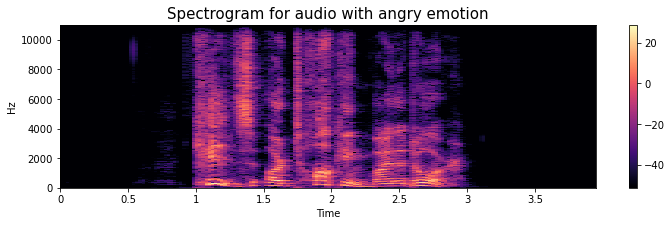

In [10]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

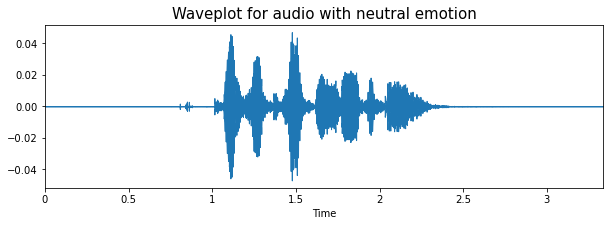

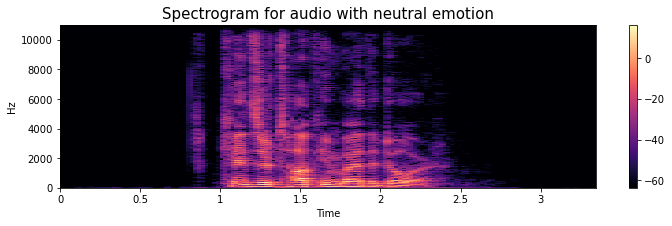

In [11]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data augmentation

In [12]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

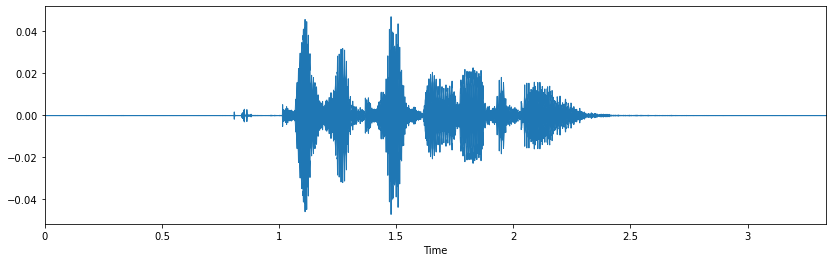

In [13]:
#Normal view
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

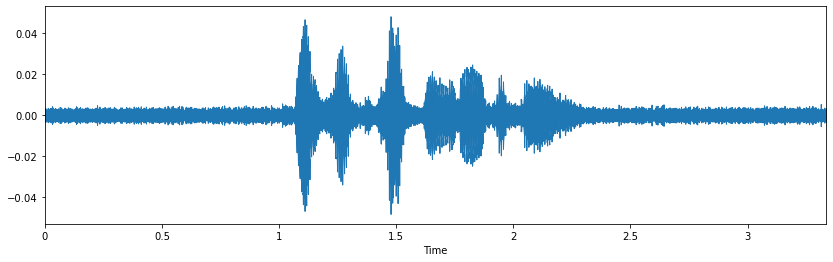

In [14]:
#Add noise in the data
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

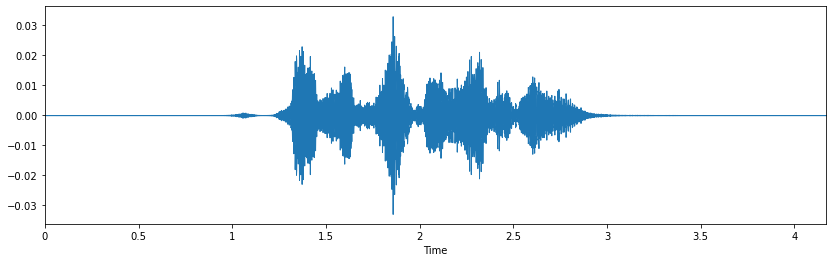

In [15]:
#apply stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

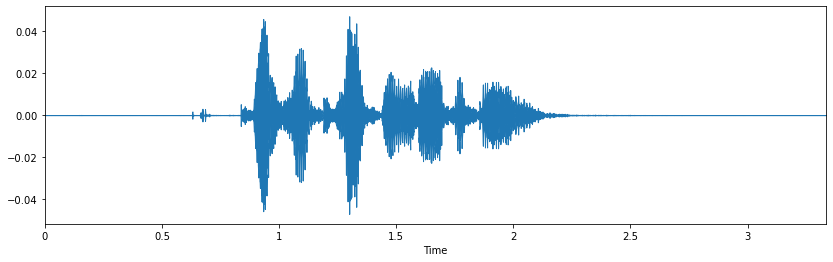

In [16]:
#shift apply
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

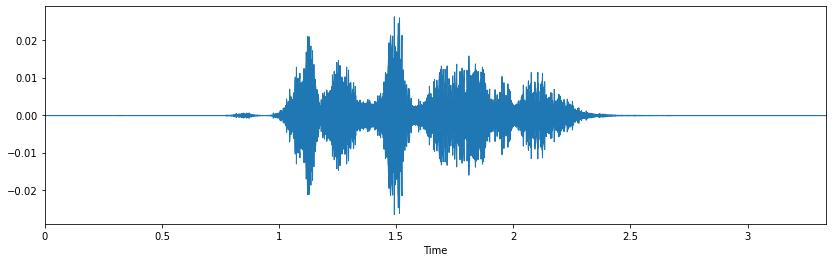

In [17]:
#Pitching
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [18]:
def extract_features(data):
    result = np.array([])
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = extract_features(data)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))
    
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result
print("executed successfully")

executed successfully


In [19]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
print("Executed")

Executed


In [20]:
len(X), len(Y), data_path.Path.shape

(14160, 14160, (4720,))

In [21]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,labels
0,1.786376e-06,0.000074,0.004800,0.027743,0.041586,0.023424,0.004574,0.024646,0.032679,0.027099,...,4.319263e-06,0.000003,0.000002,2.286677e-06,5.131693e-06,8.065748e-06,0.000005,2.270858e-06,1.642365e-07,neutral
1,3.082043e-05,0.000107,0.004802,0.027647,0.041513,0.023587,0.004579,0.024983,0.032778,0.027105,...,4.114975e-05,0.000040,0.000040,3.776961e-05,4.288086e-05,4.629968e-05,0.000042,3.843981e-05,3.661527e-05,neutral
2,2.303798e-07,0.000008,0.000282,0.003321,0.007972,0.009238,0.001775,0.002482,0.010229,0.006190,...,7.999367e-07,0.000001,0.000001,5.350822e-07,3.480663e-07,8.398366e-07,0.000001,4.287777e-07,2.878995e-08,neutral
3,2.520063e-06,0.000106,0.004554,0.025026,0.068590,0.038717,0.004544,0.014570,0.039281,0.055469,...,6.998011e-06,0.000007,0.000007,6.999257e-06,1.217880e-05,9.449916e-06,0.000008,2.638513e-06,1.788902e-07,neutral
4,3.035584e-05,0.000137,0.004595,0.025087,0.068492,0.038617,0.004556,0.014541,0.039329,0.055377,...,3.856499e-05,0.000037,0.000036,3.594113e-05,4.256419e-05,4.015501e-05,0.000040,3.360605e-05,2.966198e-05,neutral


In [22]:
#Data Preperation-
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [23]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [24]:
# splitting data in to Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 128), (10620, 8), (3540, 128), (3540, 8))

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 128), (10620, 8), (3540, 128), (3540, 8))

In [26]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 128, 1), (10620, 8), (3540, 128, 1), (3540, 8))

# Create Model now

In [27]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 128, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 64, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 128)           0

In [28]:
learning_Reduce = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[learning_Reduce])

Epoch 1/50
166/166 [==============================] - 181s 1s/step - loss: 1.9344 - accuracy: 0.2321 - val_loss: 1.7917 - val_accuracy: 0.2884
Epoch 2/50
166/166 [==============================] - 203s 1s/step - loss: 1.7658 - accuracy: 0.3035 - val_loss: 1.6198 - val_accuracy: 0.3718
Epoch 3/50
166/166 [==============================] - 216s 1s/step - loss: 1.6290 - accuracy: 0.3627 - val_loss: 1.4580 - val_accuracy: 0.4525
Epoch 4/50
166/166 [==============================] - 195s 1s/step - loss: 1.5029 - accuracy: 0.4161 - val_loss: 1.3167 - val_accuracy: 0.4847
Epoch 5/50
166/166 [==============================] - 185s 1s/step - loss: 1.4069 - accuracy: 0.4485 - val_loss: 1.2561 - val_accuracy: 0.5113
Epoch 6/50
166/166 [==============================] - 221s 1s/step - loss: 1.3362 - accuracy: 0.4832 - val_loss: 1.1424 - val_accuracy: 0.5703
Epoch 7/50
166/166 [==============================] - 215s 1s/step - loss: 1.2544 - accuracy: 0.5210 - val_loss: 1.1462 - val_accuracy: 0.5542

111/111 [==============================] - 7s 65ms/step - loss: 0.6544 - accuracy: 0.7774
Final overall Accuracy for Test :  77.74011492729187 %


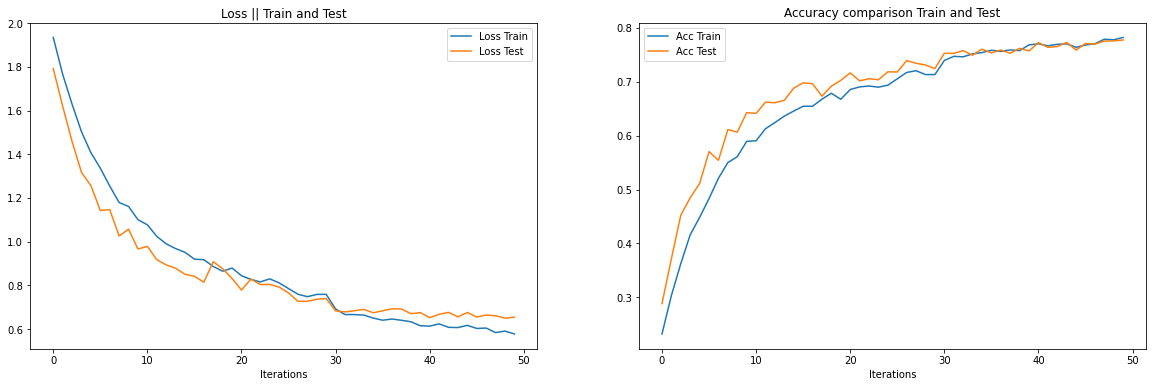

In [29]:
print("Final overall Accuracy for Test : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Loss Train')
ax[0].plot(epochs , test_loss , label = 'Loss Test')
ax[0].set_title('Loss || Train and Test')
ax[0].legend()
ax[0].set_xlabel("Iterations")

ax[1].plot(epochs , train_acc , label = 'Acc Train')
ax[1].plot(epochs , test_acc , label = 'Acc Test')
ax[1].set_title('Accuracy comparison Train and Test')
ax[1].legend()
ax[1].set_xlabel("Iterations")
plt.show()

In [31]:
# Predictions as per Test Data Samples
#y_pred = encoder.inverse_transform(pred_test)
#y_test = encoder.inverse_transform(y_test)
pred_test = model.predict(x_test)
pred_test
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()
df.head(10)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix showing actual and expected results', size=20)
plt.xlabel('Ouput Labels', size=14)
plt.ylabel('Original Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))